<a href="https://colab.research.google.com/github/KSH-13/Lending_Analytics/blob/main/Lending_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Assignment - Analytics on amount screen (1).xlsx'
df = pd.read_excel(file_path)
df.head()

,user_id,event_name,timestamp,session_id,selected_amount,Unnamed: 5,Unnamed: 6
0,1,screen_shown,2024-03-01 01:41:24,1709237453,NaN,NaN,NaN
1,1,screen_shown,2024-03-01 01:55:21,1709237453,NaN,NaN,All event names
2,1,screen_shown,2024-03-28 21:12:04,1711640497,NaN,NaN,screen_shown
3,2,screen_shown,2024-03-01 12:46:20,1709277310,NaN,NaN,continue_clicked
4,3,screen_shown,2024-03-01 07:07:30,1709256993,NaN,NaN,back_clicked


In [2]:
# Basic exploration of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21872 entries, 0 to 21871
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          21872 non-null  int64         
 1   event_name       21872 non-null  object        
 2   timestamp        21872 non-null  datetime64[ns]
 3   session_id       21872 non-null  int64         
 4   selected_amount  3332 non-null   float64       
 5   Unnamed: 5       0 non-null      float64       
 6   Unnamed: 6       6 non-null      object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.2+ MB


In [3]:
missing_values = df.isnull().sum()
print(missing_values)
print(df['event_name'].unique())
print(df['user_id'].nunique())
print(df['session_id'].nunique())

user_id                0
event_name             0
timestamp              0
session_id             0
selected_amount    18540
Unnamed: 5         21872
Unnamed: 6         21866
dtype: int64
['screen_shown' 'continue_clicked' 'back_clicked' 'need_help_clicked'
 'slider_moved']
2587
4538


In [4]:
# Q1 Conversion Percentage - Conversion is when a user clicks continue
n_unique = df['user_id'].nunique()
n_clicks = df[df['event_name'] == 'continue_clicked'].user_id.nunique()
conversion_rate = n_clicks/n_unique
print(f'Conversion rate: {conversion_rate:.2%}')

Conversion rate: 61.07%


Text(0.5, 1.0, 'Distribution of loan amount for those who continued')

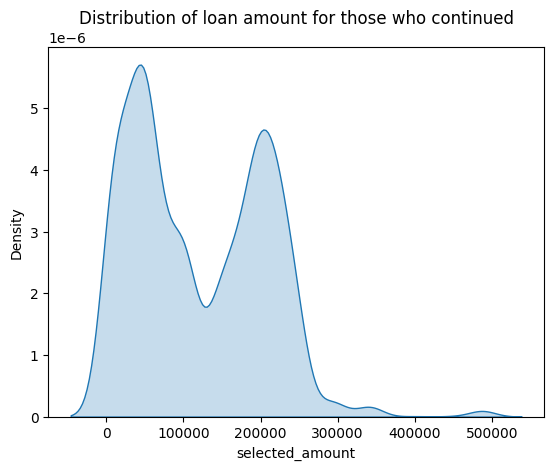

In [6]:
# Conversion rate analysis with different paramaters
sns.kdeplot(data=df[df['event_name'] == 'continue_clicked'], x='selected_amount', fill=True)
plt.title('Distribution of loan amount for those who continued')

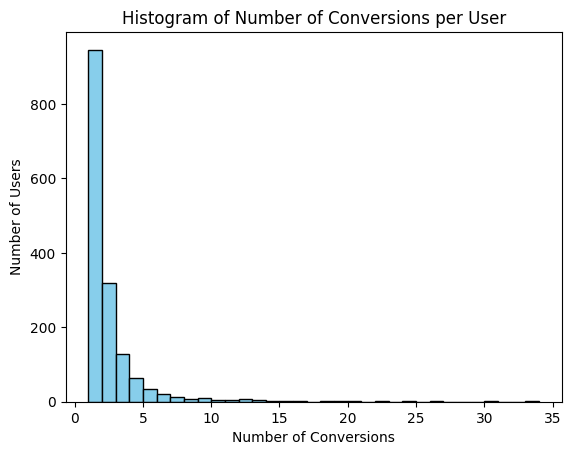

In [9]:
conversion= df[df['event_name'] == 'continue_clicked']
conversion_counts = conversion.groupby('user_id').size()
plt.hist(conversion_counts, bins=range(1, conversion_counts.max() + 2), color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Conversions per User')
plt.xlabel('Number of Conversions')
plt.ylabel('Number of Users')
plt.show()

<ipython-input-16-0375ad3112ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion['hour'] = conversion['timestamp'].dt.hour


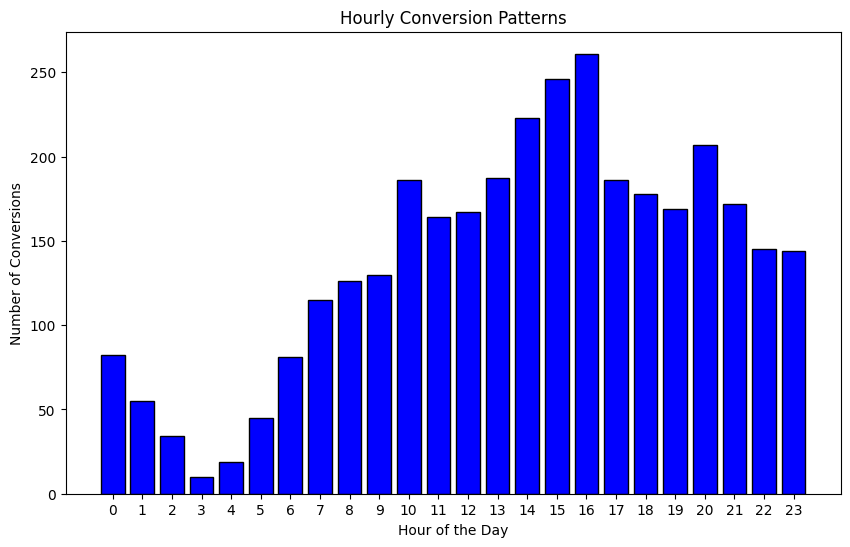

In [16]:
#Trends Based on Time
conversion['hour'] = conversion['timestamp'].dt.hour
hourly_distribution = conversion.groupby('hour').size()
plt.figure(figsize=(10, 6))
plt.bar(hourly_distribution.index, hourly_distribution.values, color='blue', edgecolor='black')
plt.title('Hourly Conversion Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Conversions')
plt.xticks(hourly_distribution.index)
plt.show()

<ipython-input-18-058de658efe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion['day'] = conversion['timestamp'].dt.dayofweek


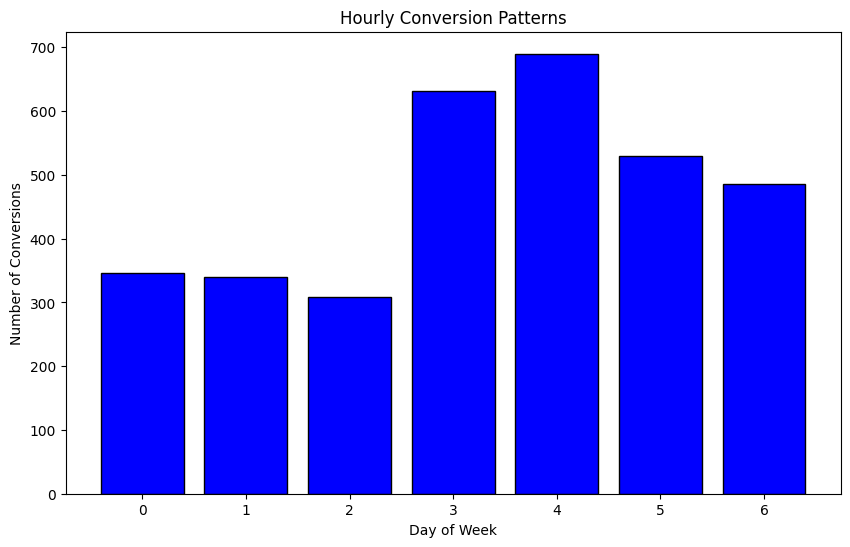

In [18]:
conversion['day'] = conversion['timestamp'].dt.dayofweek
day_distribution = conversion.groupby('day').size()
plt.figure(figsize=(10, 6))
plt.bar(day_distribution.index, day_distribution.values, color='blue', edgecolor='black')
plt.title('Hourly Conversion Patterns')
plt.xlabel('Day of Week')
plt.ylabel('Number of Conversions')
plt.xticks(hourly_distribution.index)
plt.show()

In [19]:
#q2 median time

df['timestamp'] = pd.to_datetime(df['timestamp'])
first_continue_clicks = df[df['event_name'] == 'continue_clicked'].groupby('session_id')['timestamp'].min().reset_index()
session_start_times = df.groupby('session_id')['timestamp'].min().reset_index()
merged_df = pd.merge(first_continue_clicks, session_start_times, on='session_id', suffixes=('_continue', '_start'))
merged_df['time_diff_seconds'] = (merged_df['timestamp_continue'] - merged_df['timestamp_start']).dt.total_seconds()
median_time_to_convert = merged_df['time_diff_seconds'].median()
print(f"Median time taken to convert: {median_time_to_convert} seconds")

Median time taken to convert: 9.0 seconds


In [20]:
amount = df[df['event_name'] == 'continue_clicked'].groupby('session_id')['timestamp'].min().reset_index()
filtered_df = df.merge(amount, on=['session_id', 'timestamp'], how='inner')
median_amount = filtered_df[filtered_df['event_name'] == 'continue_clicked']['selected_amount'].median()
print(median_amount)

146250.0


In [26]:
slider_data = df[df['event_name'] == 'slider_moved']
slider_counts = slider_data.groupby('session_id').size().reset_index(name='slider_movements')
print(slider_counts)

      session_id  slider_movements
0     1709233922                 1
1     1709237453                10
2     1709253412                 2
3     1709256993                 1
4     1709258648                 3
...          ...               ...
1371  1711901324                 2
1372  1711903470                 1
1373  1711904265                 2
1374  1711905585                 3
1375  1711908108                 1

[1376 rows x 2 columns]
